# MINST Fashion Classifier

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
#i was unable to import minst library it was showing some error like version not found so i imported it from Keras
#Mnist has gather data of clothes, we just used that data
ClothData = keras.datasets.fashion_mnist 
# Test Data nad Train Data has images while Train Labels and Test Labels has labels from 0 to 9
(TrainData , TrainLabel) , (TestData, TestLabel)   = ClothData.load_data() 

In [3]:
TrainData.shape #size of train dataset

(60000, 28, 28)

In [4]:
TestData.shape #size of test dataset

(10000, 28, 28)

In [5]:
TrainLabel #labels or result of training datasets

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

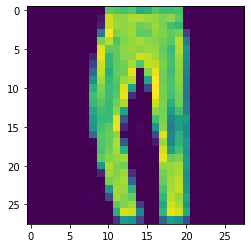

In [6]:
plt.figure()
plt.imshow(TestData[5])   #plot of testdata 5
plt.show()

In [7]:
#above image looks like an image of a Pant, and pixels values are ranging from 0 - 255
# Now 1 thing to be noted that labels are in integer, so we will assign each label with its class Name in respective order
ClothName = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#now scale pixels values from 0 - 1, for that divided it by 255
TrainData = TrainData/255
TestData = TestData/255

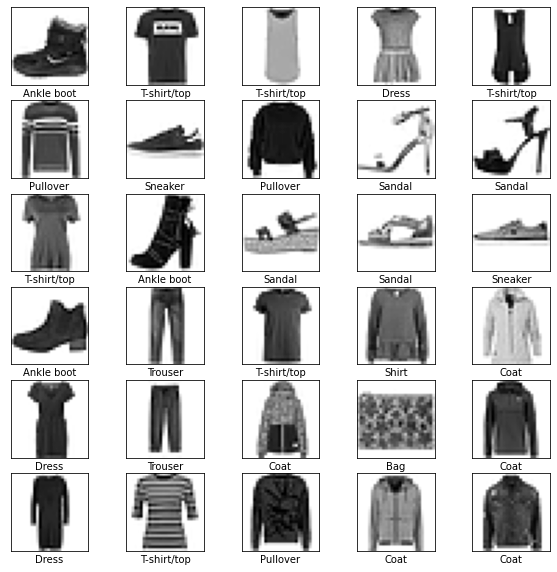

In [8]:
#plot first 30 images of TrainData and polt them with their Colth's name, to verify that it is in correct order
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(TrainData[i], cmap=plt.cm.binary)
    plt.xlabel(ClothName[TrainLabel[i]])
plt.show()


In [9]:
#keras sequential modeling appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
ClothModel = keras.Sequential([
                               keras.layers.Flatten(input_shape = (28,28)), # as we have seen our data is in 28,28
                               keras.layers.Dense(128,activation='relu'),
                               keras.layers.Dense(10,activation = 'softmax')
])
ClothModel.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
ClothModel.fit(TrainData,TrainLabel,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3748 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3143 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2710 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2559 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2481 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

In [10]:
# Now Let's Test it for a single Image and evaluate our Model.
# and use our Train Model for check it on single Image
# as I have no other image now, so i am testing it with image randomly pick from test Data
index = np.random.randint(0,10000)
img = TestData[index]
img = (np.expand_dims(img,0)) # we must add image to a list bcz our flatter layers accept data in a list
print(img.shape)

(1, 28, 28)


In [11]:
result = ClothModel.predict(img)   #prediction of test data selected randomly

In [12]:
print(result)

[[9.9159580e-01 5.8411903e-08 4.4771106e-04 1.7633201e-05 1.7152698e-07
  4.3576978e-10 7.9386421e-03 7.8029750e-18 3.0170171e-09 5.2518719e-12]]


In [13]:
#It returns list of labels and correct answer would be max value of this list
correctResult = np.argmax(result)
correctResult

0

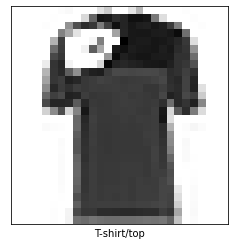

In [14]:
 # plot original image with predicted result
plt.figure()
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(TestData[index], cmap = plt.cm.binary)
plt.xlabel(ClothName[correctResult])
plt.show()

# Classification Report (Accuracy and Other Reports)

### Accuracy

In [15]:
#accuracy is 91% with TrainData, let's check it with Test Data, and evaluate accuaracy with unseen Data
loss , accuracy = ClothModel.evaluate(TestData,TestLabel,verbose=2)

313/313 - 0s - loss: 0.3299 - accuracy: 0.8860


In [16]:
# Test Accuracy is less than the Train Accuracy, It means oue model is less confident for unseen data

In [17]:
TestLabel

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [18]:
#generating y_pred values for every test data and storing it in an Array
y_pred = []
for i in range(10000):
    img = TestData[i]
    img = (np.expand_dims(img,0)) 
    result = ClothModel.predict(img) 
    correctResult = np.argmax(result)
    y_pred.append(correctResult)

In [19]:
y_pred

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 4,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 6,
 3,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 6,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 6,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 3,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 2,
 2,
 2,


In [20]:
from sklearn.metrics import f1_score

# F1-Score

In [21]:
f1_score(TestLabel, y_pred, average='macro')

0.8859863780034034

# Root Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(TestLabel, y_pred)

1.5186

# Confusion Matrix 

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(TestLabel, y_pred)

array([[841,   1,  19,  13,   7,   1, 111,   0,   7,   0],
       [  2, 969,   0,  20,   4,   0,   4,   0,   1,   0],
       [ 16,   0, 794,  10, 111,   0,  67,   0,   2,   0],
       [ 17,   5,  18, 889,  26,   0,  40,   0,   5,   0],
       [  1,   0,  77,  39, 837,   0,  42,   0,   4,   0],
       [  0,   0,   0,   0,   0, 969,   0,  21,   0,  10],
       [109,   1,  80,  26,  86,   0, 691,   0,   7,   0],
       [  0,   0,   0,   0,   0,  16,   0, 975,   0,   9],
       [  6,   0,   1,   3,   3,   3,   4,   7, 973,   0],
       [  0,   0,   0,   0,   0,   8,   1,  69,   0, 922]], dtype=int64)

In [24]:
from sklearn import metrics

# Matric Classification Report

In [25]:
print(metrics.classification_report(TestLabel,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.79      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.78      0.84      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.69      0.71      1000
           7       0.91      0.97      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## So This is My Deep Learning Model having Accurancy of 89% F1-score of 0.8815 ,Mean Squared Error of 1.5156 and Other Matrics are Provided Above.